In [1]:
pip install requests pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [69]:
import requests
import pandas as pd
api_key = ''
url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&api_key={api_key}'
response = requests.get(url)
data = response.json()['Data']['Data']
historical_df = pd.DataFrame(data)
# Converting  timestamps to 'datetime'
historical_df['time'] = pd.to_datetime(historical_df['time'], unit='s')
print(historical_df.head())    
##########

        time     high      low     open  volumefrom      volumeto    close  \
0 2019-03-03  3853.28  3788.04  3842.94    16769.86  6.406504e+07  3812.31   
1 2019-03-04  3831.01  3705.14  3812.31    39278.22  1.472457e+08  3731.28   
2 2019-03-05  3893.52  3720.49  3731.28    43262.30  1.650623e+08  3874.18   
3 2019-03-06  3916.29  3839.39  3874.18    33536.95  1.295205e+08  3874.98   
4 2019-03-07  3911.76  3853.20  3874.98    37619.38  1.462017e+08  3882.61   

  conversionType conversionSymbol  
0         direct                   
1         direct                   
2         direct                   
3         direct                   
4         direct                   


In [70]:
api_key = ''
url = f'https://min-api.cryptocompare.com/data/blockchain/histo/day?fsym=BTC&limit=2000&api_key={api_key}'
response = requests.get(url)
data = response.json()['Data']['Data']
blockchain_df = pd.DataFrame(data)
# Converting timestamp to 'datetime'
blockchain_df['time'] = pd.to_datetime(blockchain_df['time'], unit='s')
print(blockchain_df.head(10))

     id symbol       time  zero_balance_addresses_all_time  \
0  1182    BTC 2019-03-03                        468504616   
1  1182    BTC 2019-03-04                        468863087   
2  1182    BTC 2019-03-05                        469220857   
3  1182    BTC 2019-03-06                        469607160   
4  1182    BTC 2019-03-07                        469948755   
5  1182    BTC 2019-03-08                        470296511   
6  1182    BTC 2019-03-09                        470580763   
7  1182    BTC 2019-03-10                        470826892   
8  1182    BTC 2019-03-11                        471197479   
9  1182    BTC 2019-03-12                        471533584   

   unique_addresses_all_time  new_addresses  active_addresses  \
0                  491756592         328721            595430   
1                  492119994         363402            700424   
2                  492499052         379058            718015   
3                  492867788         368736            74

In [71]:
# Checking for missing values in Market data (historical_df)
missing_values = historical_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 time                0
high                0
low                 0
open                0
volumefrom          0
volumeto            0
close               0
conversionType      0
conversionSymbol    0
dtype: int64


In [72]:
# Checking for missing values in Blockchain data (blockchain_df)
missing_values = blockchain_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                                 0
symbol                             0
time                               0
zero_balance_addresses_all_time    0
unique_addresses_all_time          0
new_addresses                      0
active_addresses                   0
transaction_count                  0
transaction_count_all_time         0
large_transaction_count            0
average_transaction_value          0
block_height                       0
hashrate                           0
difficulty                         0
block_time                         0
block_size                         0
current_supply                     0
dtype: int64


In [73]:
# Looking for  non-numerical Features in Market data (historical_df)
non_numerical_columns = historical_df.select_dtypes(include=['object']).columns
print("Non-Numerical Columns in Historical Data:", non_numerical_columns)

Non-Numerical Columns in Historical Data: Index(['conversionType', 'conversionSymbol'], dtype='object')


In [74]:
# Looking for  non-numerical Features in blockchain data (blockchain_df)
non_numerical_columns = blockchain_df.select_dtypes(include=['object']).columns
print("Non-Numerical Columns in Blockchain Data:", non_numerical_columns)

Non-Numerical Columns in Blockchain Data: Index(['symbol'], dtype='object')


In [75]:
# Going to cleaning Makret data first

In [76]:
# Droping non-numerical features from Makret Data
historical_df.drop(['conversionType', 'conversionSymbol'], axis=1, inplace=True)
print(historical_df.head())

        time     high      low     open  volumefrom      volumeto    close
0 2019-03-03  3853.28  3788.04  3842.94    16769.86  6.406504e+07  3812.31
1 2019-03-04  3831.01  3705.14  3812.31    39278.22  1.472457e+08  3731.28
2 2019-03-05  3893.52  3720.49  3731.28    43262.30  1.650623e+08  3874.18
3 2019-03-06  3916.29  3839.39  3874.18    33536.95  1.295205e+08  3874.98
4 2019-03-07  3911.76  3853.20  3874.98    37619.38  1.462017e+08  3882.61


In [77]:
import numpy as np
# Moving Averages
historical_df['SMA_20'] = historical_df['close'].rolling(window=20).mean()
historical_df['SMA_50'] = historical_df['close'].rolling(window=50).mean()
# MACD
EMA_12 = historical_df['close'].ewm(span=12, adjust=False).mean()
EMA_26 = historical_df['close'].ewm(span=26, adjust=False).mean()
historical_df['MACD'] = EMA_12 - EMA_26
historical_df['Signal_Line'] = historical_df['MACD'].ewm(span=9, adjust=False).mean()
# RSI
delta = historical_df['close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
RS = avg_gain / avg_loss
historical_df['RSI'] = 100 - (100 / (1 + RS))
# Bollinger Bands
historical_df['Middle_Band'] = historical_df['SMA_20']
historical_df['Upper_Band'] = historical_df['SMA_20'] + 2 * historical_df['close'].rolling(window=20).std()
historical_df['Lower_Band'] = historical_df['SMA_20'] - 2 * historical_df['close'].rolling(window=20).std()
# Droping rows with NaN values made by Technical Indicators
historical_df.dropna(inplace=True)

In [78]:
# Checking if Technical Indicators are added successfully 
print(historical_df.tail(10))

           time      high       low      open  volumefrom      volumeto  \
1991 2024-08-14  61788.76  58461.76  60609.73    30973.89  1.858459e+09   
1992 2024-08-15  59869.57  56132.98  58698.05    34692.53  2.023439e+09   
1993 2024-08-16  59851.62  57106.84  57552.92    29186.89  1.708248e+09   
1994 2024-08-17  59708.69  58815.46  58893.67     9691.68  5.747236e+08   
1995 2024-08-18  60280.79  58433.69  59497.94    13915.75  8.300902e+08   
1996 2024-08-19  59632.55  57828.14  58439.22    24222.40  1.420740e+09   
1997 2024-08-20  61442.89  58588.82  59464.41    31292.98  1.877438e+09   
1998 2024-08-21  61851.26  58806.66  59027.55    38408.34  2.311932e+09   
1999 2024-08-22  61426.96  59756.43  61170.80    28924.51  1.754743e+09   
2000 2024-08-23  60975.44  60351.28  60387.29      928.98  5.635696e+07   

         close      SMA_20      SMA_50         MACD  Signal_Line        RSI  \
1991  58698.05  61666.6320  61700.1566 -1206.274240 -1090.982579  39.579958   
1992  57552.92  

In [79]:
# Making sure there are no missing values in Market Data
missing_values = historical_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
time           0
high           0
low            0
open           0
volumefrom     0
volumeto       0
close          0
SMA_20         0
SMA_50         0
MACD           0
Signal_Line    0
RSI            0
Middle_Band    0
Upper_Band     0
Lower_Band     0
dtype: int64


In [80]:
# Going to cleaning Blockchain Data

In [81]:
 # Making a copy of the blcockchain data and only picking the relevant features for the model 
selected_columns = ['time', 'transaction_count', 'average_transaction_value', 'hashrate']
blockchain_reduced_df = blockchain_df[selected_columns].copy()
# Renaming the columns for better understanding 
blockchain_reduced_df.rename(columns={
    'transaction_count': 'Transaction_Volume',
    'average_transaction_value': 'Transaction_Value',
    'hashrate': 'Hash_Rate'
}, inplace=True)
print(blockchain_reduced_df.tail(10))

           time  Transaction_Volume  Transaction_Value     Hash_Rate
1989 2024-08-12              450024           1.852903  6.221844e+08
1990 2024-08-13              579618           1.547156  6.738846e+08
1991 2024-08-14              504701           1.830770  5.911951e+08
1992 2024-08-15              660924           1.081635  6.923801e+08
1993 2024-08-16              575811           1.218802  6.130101e+08
1994 2024-08-17              702540           0.576645  6.423729e+08
1995 2024-08-18              769702           0.587131  6.840713e+08
1996 2024-08-19              553394           1.535471  5.812948e+08
1997 2024-08-20              717337           1.157071  6.458642e+08
1998 2024-08-21              687685           1.135869  6.685987e+08


In [82]:
# Checking for missing data in the the new blockchain data with selected features 
missing_values = blockchain_reduced_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 time                  0
Transaction_Volume    0
Transaction_Value     0
Hash_Rate             0
dtype: int64


In [83]:
print(blockchain_reduced_df.head(1))

        time  Transaction_Volume  Transaction_Value     Hash_Rate
0 2019-03-03              353683           4.091722  4.410630e+07


In [84]:
# Going to Merge the Market and Blockchain Data

In [85]:
# Finding the first date where all rows have non-NaN values for the technical indicators
first_valid_date = historical_df.dropna().index.min()
print("First valid date in historical data after handling indicators:", first_valid_date)

First valid date in historical data after handling indicators: 49


In [86]:
# Aligning the blockchain data with the valid historical Dataframe 
aligned_blockchain_df = blockchain_reduced_df.iloc[49:].copy()
# Merge the two DataFrames on their indices
combined_df = historical_df.merge(aligned_blockchain_df, left_index=True, right_index=True, how='inner')
print(combined_df.head(5))

       time_x     high      low     open  volumefrom      volumeto    close  \
49 2019-04-21  5348.59  5232.77  5326.18    25466.81  1.346812e+08  5305.74   
50 2019-04-22  5444.76  5265.73  5305.74    45346.65  2.424982e+08  5394.67   
51 2019-04-23  5626.83  5371.31  5394.67    66448.85  3.685568e+08  5539.10   
52 2019-04-24  5633.00  5390.98  5539.10    61651.16  3.390930e+08  5454.58   
53 2019-04-25  5521.61  5031.69  5454.58    70755.72  3.747987e+08  5162.67   

       SMA_20     SMA_50        MACD  Signal_Line        RSI  Middle_Band  \
49  5149.8180  4438.0860  252.321508   270.567905  54.629728    5149.8180   
50  5174.2050  4469.7332  250.301333   266.514591  54.468475    5174.2050   
51  5202.3305  4505.8896  257.387619   264.689196  64.349067    5202.3305   
52  5229.3915  4537.4976  253.264025   262.404162  55.941624    5229.3915   
53  5235.1635  4563.2514  223.860821   254.695494  54.892511    5235.1635   

     Upper_Band   Lower_Band     time_y  Transaction_Volume  \

In [87]:
# Checking for missing values in the combined Dataset
missing_values = combined_df.isnull().sum()
print("Missing values in each column of the combined DataFrame:")
print(missing_values)

Missing values in each column of the combined DataFrame:
time_x                0
high                  0
low                   0
open                  0
volumefrom            0
volumeto              0
close                 0
SMA_20                0
SMA_50                0
MACD                  0
Signal_Line           0
RSI                   0
Middle_Band           0
Upper_Band            0
Lower_Band            0
time_y                0
Transaction_Volume    0
Transaction_Value     0
Hash_Rate             0
dtype: int64


In [88]:
# perforing EDA on the combined Data

In [89]:
from scipy.stats import skew, kurtosis
# checking for skewness and kurtosis in the combined data
# Selecting only numeric columns for the kurtisis and skewness caluclation
numeric_cols = combined_df.select_dtypes(include=[np.number])
# skewness and kurtosis
skewness = numeric_cols.skew()
kurtosis_vals = numeric_cols.kurtosis()
# Displaying results
print("Skewness of the dataset:")
print(skewness)
print("\nKurtosis of the dataset:")
print(kurtosis_vals)


Skewness of the dataset:
high                  0.498906
low                   0.512282
open                  0.506521
volumefrom            2.722350
volumeto              2.367469
close                 0.505078
SMA_20                0.495725
SMA_50                0.477149
MACD                  0.313737
Signal_Line           0.287519
RSI                   0.111859
Middle_Band           0.495725
Upper_Band            0.465541
Lower_Band            0.568365
Transaction_Volume    1.656642
Transaction_Value     2.979224
Hash_Rate             1.099206
dtype: float64

Kurtosis of the dataset:
high                  -0.904640
low                   -0.855708
open                  -0.879480
volumefrom            13.897048
volumeto              10.178272
close                 -0.882431
SMA_20                -0.901475
SMA_50                -0.921772
MACD                   2.295792
Signal_Line            1.976616
RSI                   -0.436898
Middle_Band           -0.901475
Upper_Band            -

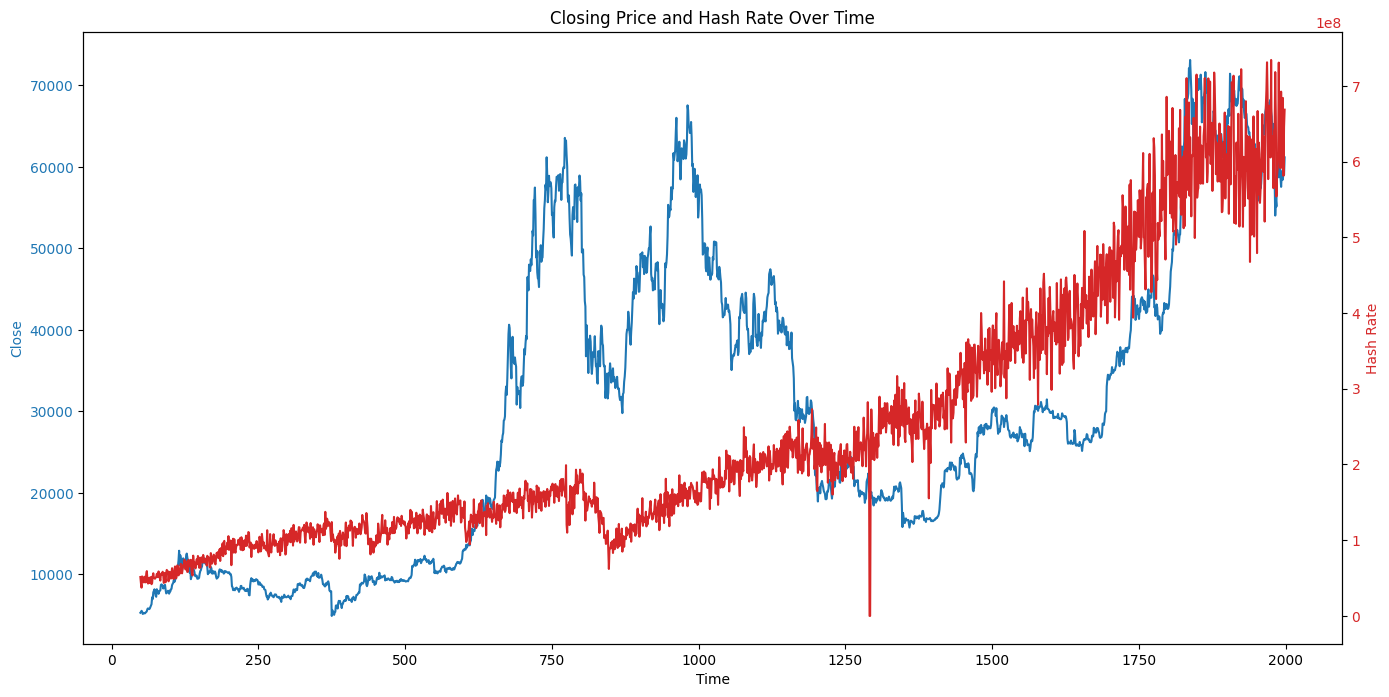

In [90]:
import matplotlib.pyplot as plt
# Plotting the Closing Price and Hash Rate over time 
fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Close', color=color)
ax1.plot(combined_df.index, combined_df['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Hash Rate', color=color)  
ax2.plot(combined_df.index, combined_df['Hash_Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.title('Closing Price and Hash Rate Over Time')
plt.show()

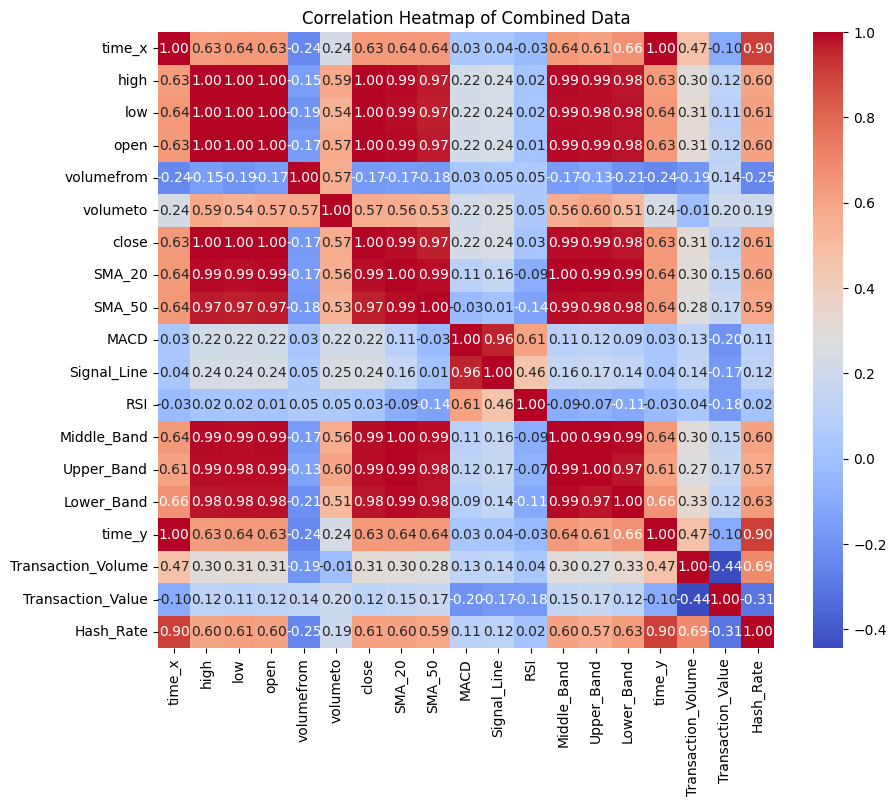

In [91]:
import seaborn as sns
# correlation matrix
corr = combined_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Combined Data')
plt.show()

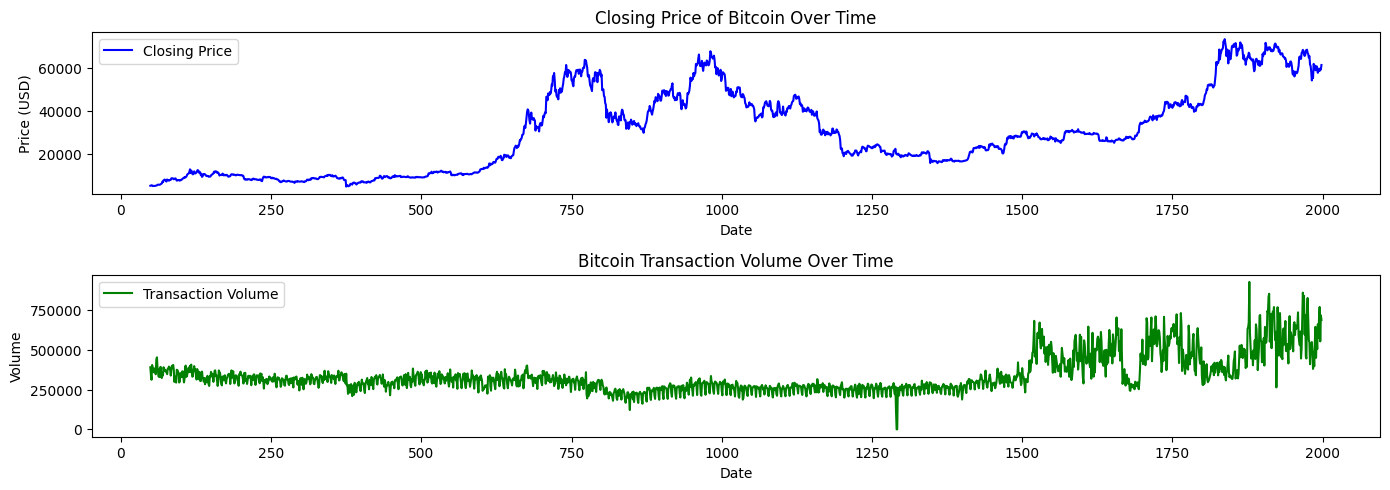

In [92]:
#  time series for closing prices, transaction volume,
plt.figure(figsize=(14, 7))
# closing price
plt.subplot(3, 1, 1)  
plt.plot(combined_df.index, combined_df['close'], label='Closing Price', color='blue')
plt.title('Closing Price of Bitcoin Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
# transaction volume
plt.subplot(3, 1, 2)  
plt.plot(combined_df.index, combined_df['Transaction_Volume'], label='Transaction Volume', color='green')
plt.title('Bitcoin Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()  
plt.show()

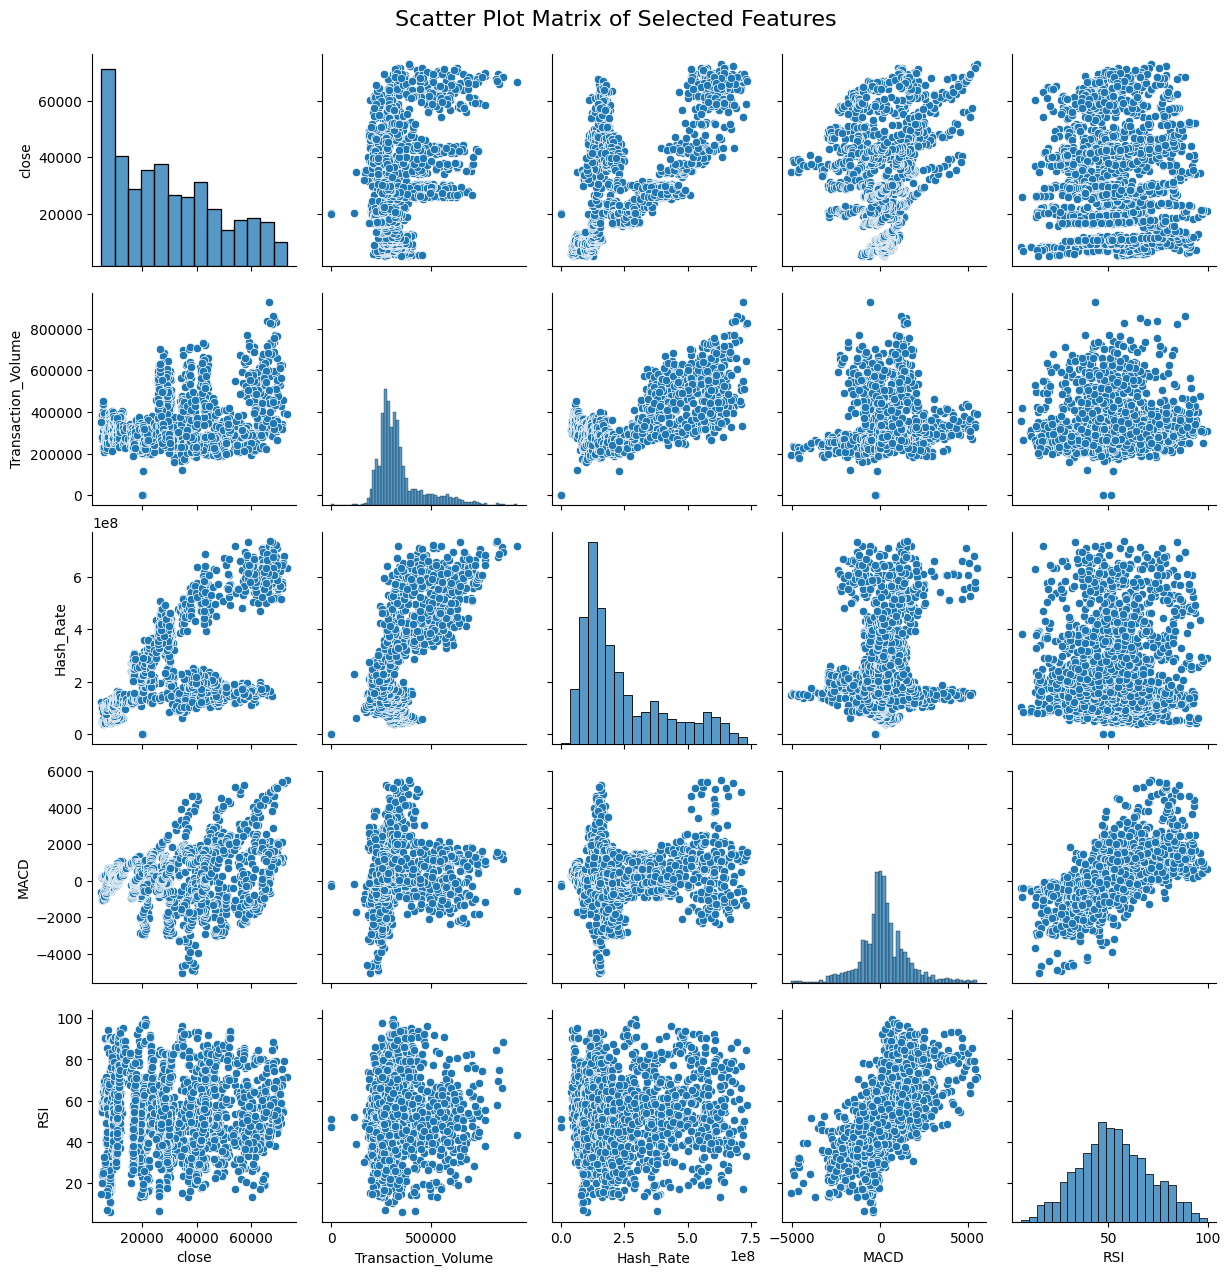

In [93]:
import pandas as pd
# scatter plot matrix
columns_to_plot = ['close', 'Transaction_Volume', 'Hash_Rate', 'MACD', 'RSI']
sns.pairplot(combined_df[columns_to_plot])
plt.suptitle('Scatter Plot Matrix of Selected Features', size=16, y=1.02)  
plt.show()

In [94]:
# Fixing the data for the models 

In [95]:
combined_df.drop('time_y', axis=1, inplace=True) 
combined_df.rename(columns={'volumefrom': 'volume'}, inplace=True)

In [96]:
print("Columns before any operation:", combined_df.columns)
# Converting datetime columns to a numerical format. calculating the days since the minimum date
if 'time_x' in combined_df.columns:
    combined_df['days_since_start_x'] = (pd.to_datetime(combined_df['time_x']) - pd.to_datetime(combined_df['time_x'].min())).dt.days
    combined_df.drop(['time_x'], axis=1, inplace=True)
print("Columns after processing datetime:", combined_df.columns)

Columns before any operation: Index(['time_x', 'high', 'low', 'open', 'volume', 'volumeto', 'close',
       'SMA_20', 'SMA_50', 'MACD', 'Signal_Line', 'RSI', 'Middle_Band',
       'Upper_Band', 'Lower_Band', 'Transaction_Volume', 'Transaction_Value',
       'Hash_Rate'],
      dtype='object')
Columns after processing datetime: Index(['high', 'low', 'open', 'volume', 'volumeto', 'close', 'SMA_20',
       'SMA_50', 'MACD', 'Signal_Line', 'RSI', 'Middle_Band', 'Upper_Band',
       'Lower_Band', 'Transaction_Volume', 'Transaction_Value', 'Hash_Rate',
       'days_since_start_x'],
      dtype='object')


In [97]:
print(combined_df.head(1))

       high      low     open    volume     volumeto    close    SMA_20  \
49  5348.59  5232.77  5326.18  25466.81  134681237.4  5305.74  5149.818   

      SMA_50        MACD  Signal_Line        RSI  Middle_Band   Upper_Band  \
49  4438.086  252.321508   270.567905  54.629728     5149.818  5424.689747   

     Lower_Band  Transaction_Volume  Transaction_Value     Hash_Rate  \
49  4874.946253              390735           2.046832  5.136583e+07   

    days_since_start_x  
49                   0  


In [98]:
start_date = pd.to_datetime('2019-04-07')
 #Creating a datetime column from 'days_since_start_x' so 'combined data has both numerical days and a datetime column
combined_df['datetime'] = pd.to_timedelta(combined_df['days_since_start_x'], unit='D') + start_date
print(combined_df[['datetime', 'days_since_start_x']].head())

     datetime  days_since_start_x
49 2019-04-07                   0
50 2019-04-08                   1
51 2019-04-09                   2
52 2019-04-10                   3
53 2019-04-11                   4


In [99]:
#checking for missing values 
missing_values = combined_df.isnull().sum()
print(missing_values)

high                  0
low                   0
open                  0
volume                0
volumeto              0
close                 0
SMA_20                0
SMA_50                0
MACD                  0
Signal_Line           0
RSI                   0
Middle_Band           0
Upper_Band            0
Lower_Band            0
Transaction_Volume    0
Transaction_Value     0
Hash_Rate             0
days_since_start_x    0
datetime              0
dtype: int64


In [100]:
# Now going to make a two copy of the combined data for the machine learning model and for the environment model 

In [101]:
scaled_df = combined_df.copy() # for the machine learning model which will be scaled 
alg_df = combined_df.copy() # for the backtrader evniroment model 

In [102]:
# setting 'time_x' as the index 
alg_df.set_index('datetime', inplace=True) 

In [103]:
# setting 'time_x' as the index 
scaled_df.set_index('days_since_start_x', inplace=True)

In [104]:
from sklearn.preprocessing import StandardScaler
#numeric columns (exclude datetime)
numeric_cols = scaled_df.select_dtypes(include=['float64', 'int64']).columns
# add the datafram to the scaler
scaler = StandardScaler()
# Scale only numeric columns
scaled_df[numeric_cols] = scaler.fit_transform(scaled_df[numeric_cols])
print(scaled_df.describe().round(2))

          high      low     open   volume  volumeto    close   SMA_20  \
count  1950.00  1950.00  1950.00  1950.00   1950.00  1950.00  1950.00   
mean     -0.00     0.00     0.00     0.00     -0.00     0.00    -0.00   
min      -1.33    -1.39    -1.34    -1.31     -1.05    -1.34    -1.33   
25%      -1.00    -1.00    -1.00    -0.63     -0.71    -1.00    -1.01   
50%      -0.17    -0.14    -0.15    -0.24     -0.28    -0.15    -0.14   
75%       0.70     0.72     0.71     0.31      0.38     0.71     0.72   
max       2.26     2.32     2.31     9.39      9.63     2.31     2.13   
std       1.00     1.00     1.00     1.00      1.00     1.00     1.00   

        SMA_50     MACD  Signal_Line      RSI  Middle_Band  Upper_Band  \
count  1950.00  1950.00      1950.00  1950.00      1950.00     1950.00   
mean      0.00    -0.00         0.00    -0.00        -0.00        0.00   
min      -1.36    -3.85        -3.57    -2.62        -1.33       -1.34   
25%      -1.01    -0.45        -0.44    -0.69 

In [105]:
# Ensure 'days_since_start_x' is available as a column and not as an index in scaled_df
if 'days_since_start_x' in scaled_df.index.names:
    scaled_df.reset_index('days_since_start_x', drop=False, inplace=True)
# If 'datetime' is not set as index, set it
if 'datetime' not in scaled_df.index.names:
    scaled_df.set_index('datetime', inplace=True)

In [106]:
# Ensure 'days_since_start_x' is available as a column and not as an index in alg_df
if 'datetime' in alg_df.index.names:
    alg_df.reset_index('datetime', drop=False, inplace=True)
# If 'datetime' is not set as index, set it
if 'days_since_start_x' not in alg_df.index.names:
    alg_df.set_index('days_since_start_x', inplace=True)

In [107]:
#checking for missing values in sacled_df
missing_values = scaled_df.isnull().sum()
print(missing_values)

days_since_start_x    0
high                  0
low                   0
open                  0
volume                0
volumeto              0
close                 0
SMA_20                0
SMA_50                0
MACD                  0
Signal_Line           0
RSI                   0
Middle_Band           0
Upper_Band            0
Lower_Band            0
Transaction_Volume    0
Transaction_Value     0
Hash_Rate             0
dtype: int64


In [108]:
#checking for missing values in alg_df
missing_values =  alg_df.isnull().sum()
print(missing_values)

datetime              0
high                  0
low                   0
open                  0
volume                0
volumeto              0
close                 0
SMA_20                0
SMA_50                0
MACD                  0
Signal_Line           0
RSI                   0
Middle_Band           0
Upper_Band            0
Lower_Band            0
Transaction_Volume    0
Transaction_Value     0
Hash_Rate             0
dtype: int64


In [109]:
# need to make sure both dataframes are in the same order 
if 'days_since_start_x' in alg_df.index.names:
    alg_df.reset_index('days_since_start_x', drop=False, inplace=True)
# If 'datetime' is not set as index, set it
if 'datetime' not in alg_df.index.names:
    alg_df.set_index('datetime', inplace=True)

In [110]:
#checking for missing values in sacled_df
missing_values = scaled_df.isnull().sum()
print(missing_values)

days_since_start_x    0
high                  0
low                   0
open                  0
volume                0
volumeto              0
close                 0
SMA_20                0
SMA_50                0
MACD                  0
Signal_Line           0
RSI                   0
Middle_Band           0
Upper_Band            0
Lower_Band            0
Transaction_Volume    0
Transaction_Value     0
Hash_Rate             0
dtype: int64


In [111]:
#checking for missing values in alg_df
missing_values =  alg_df.isnull().sum()
print(missing_values)

days_since_start_x    0
high                  0
low                   0
open                  0
volume                0
volumeto              0
close                 0
SMA_20                0
SMA_50                0
MACD                  0
Signal_Line           0
RSI                   0
Middle_Band           0
Upper_Band            0
Lower_Band            0
Transaction_Volume    0
Transaction_Value     0
Hash_Rate             0
dtype: int64


In [112]:
# Checking all data is numeric in alg dataframe 
non_numeric_columns = alg_df.select_dtypes(exclude=['float64', 'int64']).columns
if non_numeric_columns.empty:
    print("All columns are numeric.")
else:
    print("Non-numeric columns found:", non_numeric_columns)

All columns are numeric.


In [113]:
# Checking all data is numeric in scaled dataframe 
non_numeric_columns = scaled_df.select_dtypes(exclude=['float64', 'int64']).columns
if non_numeric_columns.empty:
    print("All columns are numeric.")
else:
    print("Non-numeric columns found:", non_numeric_columns)

All columns are numeric.


In [114]:
from sklearn.model_selection import train_test_split
# Defining the features and target variable (close price)
X = scaled_df.drop('close', axis=1)  # All columns except close price
y = scaled_df['close']  # Target variable: close price
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Checking the shapes of the split data for the machine learning model 
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1560, 17)
Testing set shape: (390, 17)


In [115]:
# preliminary test to pick the best model 

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
# Getting the Gradient Boosting Regressor model set
gb_model = GradientBoostingRegressor(random_state=42)
# Fit the model with the  training data
gb_model.fit(X_train, y_train)
# after training the model exposing it to unseen data the test data
y_pred_gb = gb_model.predict(X_test)
# MSE calculation for the model 
mse_gb = mean_squared_error(y_test, y_pred_gb)
# RMSE calculation for the model 
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)

print("Gradient Boosting MSE:", mse_gb)
print(f"Gradient Boosting RMSE: {gb_rmse}")

Gradient Boosting MSE: 0.0014051922988140807
Gradient Boosting RMSE: 0.03748589466471463


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [117]:
from sklearn.neighbors import KNeighborsRegressor
# Getting the k-Nearest Neighbors Regressor model set 
knn_model = KNeighborsRegressor(n_neighbors=5)
# Fit the model with the  training data
knn_model.fit(X_train, y_train)
# after training the model exposing it to unseen data the test data
y_pred_knn = knn_model.predict(X_test)
# MSE calculation for the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
# RMSE calculation for the model 
knn_rmse = mean_squared_error(y_test, y_pred_knn, squared=False)

print("k-Nearest Neighbors MSE:", mse_knn)
print(f"k-Nearest Neighbors RMSE: {knn_rmse}")

k-Nearest Neighbors MSE: 0.002923292787952082
k-Nearest Neighbors RMSE: 0.05406748364730952


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [118]:
# Going to use the Gradient Boosting Regressor model for the machine learning model for the trading strategy after the preliminary test

In [119]:
from sklearn.model_selection import cross_val_score
# Getting the Gradient Boosting Regressor model set for the cross validation 
gb_model = GradientBoostingRegressor(random_state=42)
# 10-fold cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=10, scoring='neg_mean_squared_error')
# checking the standard deviation of the MSE scores from the cross validation 
cv_mse = -cv_scores  # Negate to convert scores to positive MSE values
mean_cv_mse = cv_mse.mean()
std_cv_mse = cv_mse.std()
print(f"Average CV MSE: {mean_cv_mse:.5f}")
print(f"Standard Deviation of CV MSE: {std_cv_mse:.5f}")

Average CV MSE: 0.00307
Standard Deviation of CV MSE: 0.00519


In [120]:
# need to do further fine tuning the model to make sure it is the best model for the trading strategy 

In [121]:
## performing Gridsearch to find the best hyperparameters for the model 
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import GradientBoostingRegressor
## Getting the Gradient Boosting Regressor model set for the GridSearch
#gb_model = GradientBoostingRegressor(random_state=42)
#Creating a parameter grid
#param_grid = {
    #'n_estimators': [100, 200, 300],
    #'learning_rate': [0.01, 0.1, 0.2],
    #'max_depth': [3, 5, 7],
    #'min_samples_split': [2, 4, 6],
    #'min_samples_leaf': [1, 2, 3],
    #'subsample': [0.8, 0.9, 1.0]
##}
# Gradient Boosting Regressor model for a 5 fold cross validation could not pick 10 as it was taking too long and did not have the computer power to run it. with MSE as the scoring metric
##grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# putting data in the GridSearch 
##grid_search.fit(X_train, y_train)
##print("Best parameters:", grid_search.best_params_)
##print("Best cross-validation MSE:", -grid_search.best_score_)

In [122]:
# I have comment the GridSearch as I have already run it and got the best parameters, It took 10 minutes to run on my computer. if wish to run it please uncomment the double # and run the code

In [123]:
# Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}

In [124]:
# Setting up the Gradient Boosting Regressor model with optimized parameters
optimized_gb = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=7,
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)
# Getting the omptimized Gradinet Boosting Regressor model trained with the training data
optimized_gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=3, n_estimators=300,
                          random_state=42, subsample=0.8)

In [125]:
from sklearn.metrics import r2_score
# after training the omtimized model now going to expose it to unseen data the test data
y_pred_optimized = optimized_gb.predict(X_test)
# Calculating the MSE, RMSE, R² score for the optimized model 
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)
r2_optimized = r2_score(y_test, y_pred_optimized)
print(f"Optimized Gradient Boosting MSE: {mse_optimized}")
print(f"Optimized Gradient Boosting RMSE: {rmse_optimized}")
print(f"Optimized Gradient Boosting R²: {r2_optimized}")
# Checking what the most important Feature are in the optimized model 
feature_importances = optimized_gb.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

Optimized Gradient Boosting MSE: 0.0011286470155158052
Optimized Gradient Boosting RMSE: 0.03359534216994679
Optimized Gradient Boosting R²: 0.9988423911966818
               Feature  Importance
2                  low    0.550711
1                 high    0.446985
0   days_since_start_x    0.001251
3                 open    0.000315
10                 RSI    0.000140
13          Lower_Band    0.000079
12          Upper_Band    0.000070
5             volumeto    0.000060
4               volume    0.000059
16           Hash_Rate    0.000057
6               SMA_20    0.000057
7               SMA_50    0.000046
8                 MACD    0.000045
15   Transaction_Value    0.000042
14  Transaction_Volume    0.000038
9          Signal_Line    0.000032
11         Middle_Band    0.000015


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [126]:
# Now going to use the optimized model for the trading strategy in backtrader evniroment 

In [127]:
pip install backtrader


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [128]:
import backtrader as bt

class MLStrategy(bt.Strategy):
    params = (
        ('model', None),
        ('buy_threshold', 0.5),  # Buy threshold
        ('sell_threshold', 0.5),  # Sell threshold
        ('hold_period', 10),  # Maximum hold period in days
        ('stop_loss', 0.03),  # 3% stop loss
        ('take_profit', 0.10)  # 10% take profit
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        
        # Seting up the indicators that were used in the machine learning model 
        self.sma20 = bt.indicators.SimpleMovingAverage(self.datas[0].close, period=20)
        self.sma50 = bt.indicators.SimpleMovingAverage(self.datas[0].close, period=50)
        self.macd = bt.indicators.MACD(self.datas[0].close)
        self.rsi = bt.indicators.RSI(self.datas[0].close)
        self.bbands = bt.indicators.BollingerBands(self.datas[0].close)
        
        # Trade tracking variables
        self.trade_count = 0
        self.win_count = 0
        self.loss_count = 0
        self.holding_period = 0
        self.buy_price = None
        self.profits = []

    def next(self):
        if len(self) < 50:  # making sure enough data is available due to the indicators
            return

        features = np.array([
            self.datas[0].datetime.date(0).toordinal(),
            self.datas[0].high[0],
            self.datas[0].low[0],
            self.datas[0].open[0],
            self.datas[0].volume[0],
            getattr(self.datas[0], 'volumeto', 0),
            self.sma20[0],
            self.sma50[0],
            self.macd.macd[0],
            self.macd.signal[0],
            self.rsi[0],
            self.bbands.mid[0],
            self.bbands.top[0],
            self.bbands.bot[0],
            getattr(self.datas[0], 'Transaction_Volume', 0),
            getattr(self.datas[0], 'Transaction_Value', 0),
            getattr(self.datas[0], 'Hash_Rate', 0)
        ]).reshape(1, -1)

        # The Prediction  using the model
        prediction = self.params.model.predict(features)[0]

        if not self.position:
            if prediction > self.params.buy_threshold:
                self.buy_price = self.dataclose[0]
                self.buy()
                self.holding_period = 0
                self.trade_count += 1
                print(f"Buy order placed at price: {self.dataclose[0]}")
        else:
            self.holding_period += 1
            if (self.dataclose[0] < self.buy_price * (1.0 - self.params.stop_loss)):
                self.sell()
                self.trade_count += 1
                print(f"Sell order placed at price: {self.dataclose[0]} due to stop-loss")
            elif (self.dataclose[0] > self.buy_price * (1.0 + self.params.take_profit)):
                self.sell()
                self.trade_count += 1
                print(f"Sell order placed at price: {self.dataclose[0]} due to take-profit")
            elif self.holding_period >= self.params.hold_period or prediction < self.params.sell_threshold:
                self.sell()
                self.trade_count += 1
                print(f"Sell order placed at price: {self.dataclose[0]} due to holding period expiration or sell condition")

    def notify_trade(self, trade):
        if trade.isclosed:
            if trade.pnl > 0:
                self.win_count += 1
                self.profits.append(trade.pnl)
            else:
                self.loss_count += 1
            print(f"Closed trade profit: {trade.pnl:.2f}")

    def stop(self):
        print(f"Final Portfolio Value: {self.broker.getvalue()}")
        print(f"Total Trades: {self.trade_count}, Wins: {self.win_count}, Losses: {self.loss_count}")
        print(f"Total Profit: {sum(self.profits):.2f}")

In [129]:
# Setting up and run the Cerebro engine for the backtrader enviroment 
datafeed = bt.feeds.PandasData(dataname=alg_df)
cerebro = bt.Cerebro()
cerebro.adddata(datafeed)
cerebro.addstrategy(MLStrategy, model=optimized_gb)
cerebro.broker.set_cash(10000)
cerebro.broker.setcommission(commission=0.001, leverage=3)
# Run the machine learning trading algorithm 
results = cerebro.run()

Buy order placed at price: 7643.44
Sell order placed at price: 8693.96 due to take-profit
Closed trade profit: 1050.52
Buy order placed at price: 8853.56
Sell order placed at price: 10218.87 due to take-profit
Closed trade profit: 1365.31
Buy order placed at price: 10689.54
Sell order placed at price: 12913.28 due to take-profit
Closed trade profit: 2223.74
Buy order placed at price: 11154.09
Sell order placed at price: 12355.06 due to take-profit
Closed trade profit: 1200.97
Buy order placed at price: 11884.1
Sell order placed at price: 10769.05 due to stop-loss
Closed trade profit: -1115.05
Buy order placed at price: 10591.87
Sell order placed at price: 11981.61 due to take-profit
Closed trade profit: 1389.74
Buy order placed at price: 11156.52
Sell order placed at price: 12296.16 due to take-profit
Closed trade profit: 1139.64
Buy order placed at price: 12567.02
Sell order placed at price: 12099.12 due to stop-loss
Closed trade profit: -467.90
Buy order placed at price: 11343.12
Sel

In [130]:
# The final portfolio value and the cash left in the account after the simulation 
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print('Cash: %.2f' % cerebro.broker.getcash())
for a, b in enumerate(cerebro.datas):
    print('Data%d: %s' % (a, b._name))
    print('  - Close: %.2f' % b.close[0])

Final Portfolio Value: 5385.93
Cash: 5385.93
Data0: 
  - Close: 61170.80


In [131]:
class BuyAndHoldStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None

        # Setting up indicators to match in the previous strategy
        self.sma20 = bt.indicators.SimpleMovingAverage(self.datas[0].close, period=20)
        self.sma50 = bt.indicators.SimpleMovingAverage(self.datas[0].close, period=50)
        self.macd = bt.indicators.MACD(self.datas[0].close)
        self.rsi = bt.indicators.RSI(self.datas[0].close)
        self.bbands = bt.indicators.BollingerBands(self.datas[0].close)

    def next(self):
        if not self.position:  # Check if no position is open
            self.order = self.buy()  # Buy at the first available opportunity
            print(f"Buy order placed at price: {self.dataclose[0]} on {self.datas[0].datetime.date(0)}")

    def stop(self):
        print(f'Final Portfolio Value: {self.broker.getvalue():.2f}')
        print(f'Final Cash: {self.broker.getcash():.2f}')


In [132]:
# Setting up and run the Cerebro engine for the backtrader enviroment 
datafeed = bt.feeds.PandasData(dataname=alg_df)
cerebro = bt.Cerebro()
cerebro.adddata(datafeed)
cerebro.addstrategy(BuyAndHoldStrategy)
cerebro.broker.set_cash(10000)
cerebro.broker.setcommission(commission=0.001, leverage=3)
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
# Run the Buy and Hold trading algorithm 
results = cerebro.run()

Buy order placed at price: 7643.44 on 2019-05-26
Final Portfolio Value: 63519.72
Final Cash: 7444.54


In [133]:
# The final portfolio value and the cash left in the account after the simulation 
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print('Cash: %.2f' % cerebro.broker.getcash())
for i, t in enumerate(cerebro.datas):
    print('Data%d: %s' % (i, t._name))
    print('  - Close: %.2f' % t.close[0])

Final Portfolio Value: 63519.72
Cash: 7444.54
Data0: 
  - Close: 61170.80
